# Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

# Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [63]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import pandas.api.types as typeop
#from pandas_visual_analysis import VisualAnalysis

In [64]:
#Loading the data
import os
os.chdir("C:\\Users\\Raman\\Desktop\\praxis_study_material\\IML")

diabetes_data = pd.read_csv("diabetes.csv")

In [65]:
#checking of the data,what does it include and all
diabetes_data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
169,3,111,90,12,78,28.4,0.495,29,0
38,2,90,68,42,0,38.2,0.503,27,1
158,2,88,74,19,53,29.0,0.229,22,0
681,0,162,76,36,0,49.6,0.364,26,1
331,2,87,58,16,52,32.7,0.166,25,0


Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test

BloodPressure(BP): Diastolic blood pressure (mm Hg)

SkinThickness(ST): Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)2)

DiabetesPedigreeFunction(DPF):a function which scores likelihood of diabetes based on family history

Age: years

Outcome: Class variable (0 if non-diabetic, 1 if diabetic)


Do we have any NA values?

Do we have any values which are not possible in real life.(if yes count where and how many times)

What is the Avg BMI of the person?

Which is the min age and max age in the dataset?

Are there any outliers in variables if we compare to real life ?


pregnancies-descrete-(can have zero)

Glucose-descrete-(cannot have zero)

BP-descrete-(cannot have zero)

ST-descrete-(cannot have zero)

Insulin-descrete-(cannot have zero)

BMI-continuous-(cannot have zero)

DPF-continuous-(doesnot have zero)

AGE-descrete-(can have zero)

OUTCOME- 0(non diabetic) or 1(diabetic)

In [66]:
#description of the data
diabetes_data.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


It summarizes the dataset. This method tells us a lot of things about a dataset.It is usually used for Numerical values but if we want to see the summary about the categorical values then we can pass df.describe(include='object').

Now, let's understand the statistics that are generated by the describe() method:

-count tells us the number of rows in a feature.

-mean tells us the mean value of that feature.

-std tells us the Standard Deviation Value of that feature.

-min tells us the minimum value of that feature.

-25%, 50%, and 75% are the Q1,Q2(median),Q3 of each features. This quartile information helps us to detect Outliers.
-we can find out the outliers by using this formula; value less than this Q1-IQR*1.5 or greater than this Q3+IQR*1.5 is outlier.

-max tells us the maximum value of that feature.


In [67]:
#copying the data into another df.
#we can copy the data by two ways; Deep or shallow
diabetes_data_copy=diabetes_data.copy()

In [68]:
diabetes_data_copy.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [69]:
type(diabetes_data_copy)

pandas.core.frame.DataFrame

In [70]:
#tells us about the number of rows and column in the dataset
diabetes_data_copy.shape

(768, 9)

In [71]:
#tells us about the column names
list(diabetes_data_copy)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [72]:
#datatype of the variables present in the dataset
diabetes_data_copy.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Finding the Zeroes value in the dataset.
If there are any unrealistic or NA values then we will impute the values accordingly. 

In [73]:
#we can identify what type of distribution the respective variables are following by mean,median,mode
#if all are same mean = median = mode then it is normal distribution
#if mean>median>mode then it is Right Skewed distribution
#if mode>median>mean then it is Left skewed distribution

In [74]:
print('Median is:',np.median(diabetes_data_copy.Glucose))
print('Mode is:',stats.mode(diabetes_data_copy.Glucose))
print('Total number of ZERO Values:',np.sum(diabetes_data_copy.Glucose==0))
diabetes_data_copy.loc[(diabetes_data_copy.Glucose==0)].head(3)

Median is: 117.0
Mode is: ModeResult(mode=array([99], dtype=int64), count=array([17]))
Total number of ZERO Values: 5


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0


In [75]:
print('Median is:',np.median(diabetes_data_copy.BloodPressure))
print('Mode is:',stats.mode(diabetes_data_copy.BloodPressure))
print('total number  ZERO Values:',np.sum(diabetes_data_copy.BloodPressure==0))
diabetes_data_copy.loc[(diabetes_data_copy.BloodPressure==0)].head(3)

Median is: 72.0
Mode is: ModeResult(mode=array([70], dtype=int64), count=array([57]))
total number  ZERO Values: 35


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0


In [76]:
print('Median is:',np.median(diabetes_data_copy.SkinThickness))
print('Mode is:',stats.mode(diabetes_data_copy.SkinThickness))
print('total number  ZERO Values:',np.sum(diabetes_data_copy.SkinThickness==0))
diabetes_data_copy.loc[(diabetes_data_copy.SkinThickness==0)].head(3)

Median is: 23.0
Mode is: ModeResult(mode=array([0], dtype=int64), count=array([227]))
total number  ZERO Values: 227


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0


In [77]:
print('Median is:',np.median(diabetes_data_copy.Insulin))
print('Mode is:',stats.mode(diabetes_data_copy.Insulin))
print('total number  ZERO Values:',np.sum(diabetes_data_copy.Insulin ==0))
diabetes_data_copy.loc[(diabetes_data_copy.Insulin ==0)].head(3)

Median is: 30.5
Mode is: ModeResult(mode=array([0], dtype=int64), count=array([374]))
total number  ZERO Values: 374


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [78]:
print('Median is:',np.median(diabetes_data_copy.BMI))
print('Mode is:',stats.mode(diabetes_data_copy.BMI))
print('total number  ZERO Values:',np.sum(diabetes_data_copy.BMI==0))
diabetes_data_copy.loc[(diabetes_data_copy.BMI==0)].head(3)

Median is: 32.0
Mode is: ModeResult(mode=array([32.]), count=array([13]))
total number  ZERO Values: 11


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0


In [79]:
#Checking the rows where there is more than one Zero value in the dataset and will be removing it from the data.
diabetes_data_copy.loc[(diabetes_data_copy.BloodPressure==0)&(diabetes_data_copy.SkinThickness==0)&
                       (diabetes_data_copy.Insulin ==0)&(diabetes_data_copy.BMI==0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
706,10,115,0,0,0,0.0,0.261,30,1


In [80]:
j=diabetes_data_copy[((diabetes_data_copy.BloodPressure==0)&(diabetes_data_copy.SkinThickness==0)&
                       (diabetes_data_copy.Insulin ==0)&(diabetes_data_copy.BMI==0))]
diabetes_data_copy=diabetes_data_copy.drop(j.index, axis=0)
diabetes_data_copy.shape

(761, 9)

In [81]:
#Checking the rows where there is more than one Zero value in the dataset and will be removing it from the data.
diabetes_data_copy.loc[(diabetes_data_copy.Insulin ==0)&(diabetes_data_copy.Glucose==0)]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [82]:
j=diabetes_data_copy[((diabetes_data_copy.Insulin ==0)&(diabetes_data_copy.Glucose==0))]
diabetes_data_copy=diabetes_data_copy.drop(j.index, axis=0)
diabetes_data_copy.shape

(757, 9)

In [83]:
diabetes_data_copy.shape

(757, 9)

We will check the  correlation between two columns , excluding NA/null values.


Correlation is a bivariate analysis that measures the strength of association between two variables and the direction of the relationship.  In terms of the strength of relationship, the value of the correlation coefficient varies between +1 and -1. + sign indicates the positive relationship and - sign indicates the negatibve relationship



different method : {'pearson', 'kendall', 'spearman'} 




A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.



In [84]:
diabetes_data_copy_corr=diabetes_data_copy.corr()
diabetes_data_copy_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.15,-0.08,-0.07,0.02,-0.04,0.55,0.22
Glucose,0.13,1.00,0.14,0.07,0.33,0.22,0.13,0.26,0.49
BloodPressure,0.15,0.14,1.00,0.18,0.07,0.17,0.02,0.23,0.05
SkinThickness,-0.08,0.07,0.18,1.00,0.44,0.38,0.18,-0.13,0.07
Insulin,-0.07,0.33,0.07,0.44,1.00,0.19,0.18,-0.05,0.13
BMI,0.02,0.22,0.17,0.38,0.19,1.00,0.12,0.01,0.30
DiabetesPedigreeFunction,-0.04,0.13,0.02,0.18,0.18,0.12,1.00,0.03,0.17
Age,0.55,0.26,0.23,-0.13,-0.05,0.01,0.03,1.00,0.23
Outcome,0.22,0.49,0.05,0.07,0.13,0.30,0.17,0.23,1.00


From here we can conclude that Age and Pregnancies are correlated with each other.
Other Pairs are which shows some correlation are: (Insulin and skin thickness) and (BMI and Insulin)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000680FFBE5F8>,
      dtype=object)

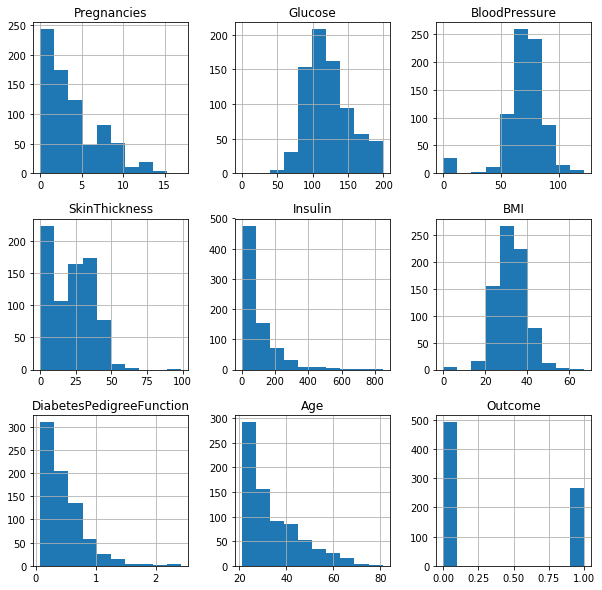

In [85]:
diabetes_data_copy.hist(figsize = (10,10))

1)we can identify what type of distribution the respective variables are following by mean,median,mode

-if all are same mean = median = mode then it is normal distribution

-if mean>median>mode then it is Right Skewed distribution

-if mode>median>mean then it is Left skewed distribution

Skewness
-A left-skewed distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

-A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.



2)
-So Pregnancies,Skin Thickness,Insulin,DPF follows Right skewed distributions.

-Glucose,BMI,Blood Pressure follows a normal distribution.

In [86]:

diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
   

We will first replace the 0 with Na and then will impute with mean which follows normal distribution(BMI,Glucose,Blood pressure).

Will impute with median which follows right skewed distribution(Pregnancies,Skin Thickness,Insulin,DPF)

In [87]:
#checking the total number of null values
diabetes_data_copy.isnull().sum()

Pregnancies                   0
Glucose                       1
BloodPressure                28
SkinThickness               220
Insulin                     363
BMI                           4
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [88]:
diabetes_data_copy.Glucose[diabetes_data_copy['Glucose'].isnull()]=diabetes_data_copy.Glucose.mean()

In [89]:
diabetes_data_copy.BloodPressure[diabetes_data_copy['BloodPressure'].isnull()]=diabetes_data_copy.BloodPressure.mean()

In [90]:
diabetes_data_copy.BMI[diabetes_data_copy['BMI'].isnull()]=diabetes_data_copy.BMI.mean()

In [91]:
diabetes_data_copy.SkinThickness[diabetes_data_copy['SkinThickness'].isnull()]=diabetes_data_copy.SkinThickness.median()

In [92]:
diabetes_data_copy.Insulin[diabetes_data_copy['Insulin'].isnull()]=diabetes_data_copy.Insulin.median()

Checking the Graphs again after imputation, did they change their behaviour.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000680FF298D0>,
      dtype=object)

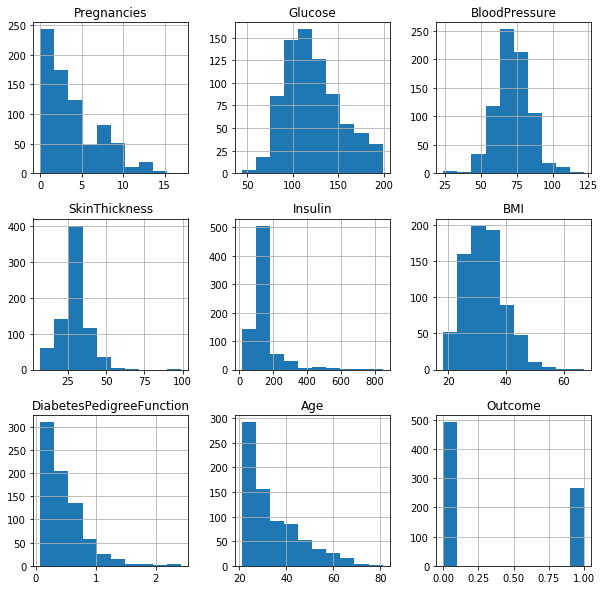

In [93]:
diabetes_data_copy.hist(figsize = (10,10))

Now we will check the behaviour of different features with the target.

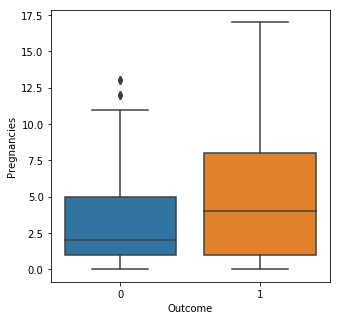

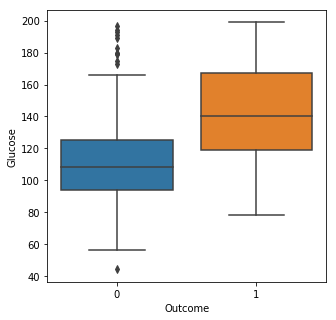

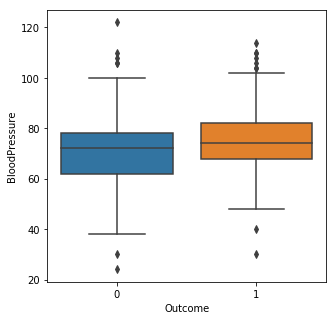

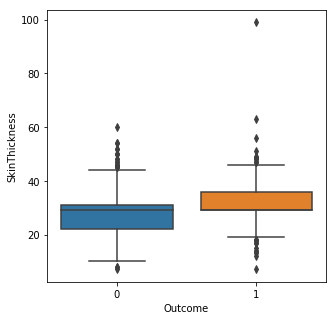

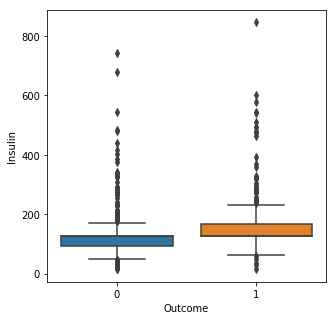

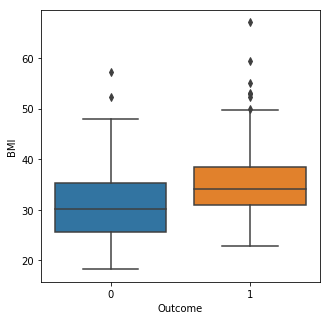

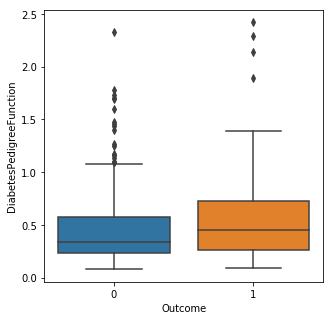

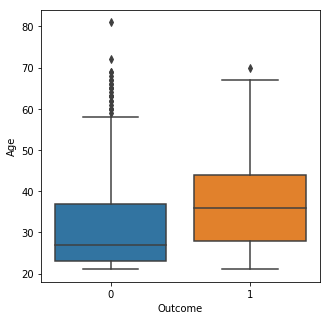

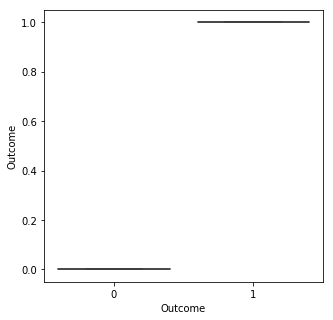

In [94]:
for i in diabetes_data_copy:
    fig, ax2 = plt.subplots(figsize=(5, 5))
    sns.boxplot(x="Outcome", y=i, data=diabetes_data_copy)
    

Those who are diabitic have higher glucose level,Skin Thickness,Insulin And BMI.

With the Age, the chance of havinng Diabetes Increases. The more you get older , the more the chance of having the diabetes. 

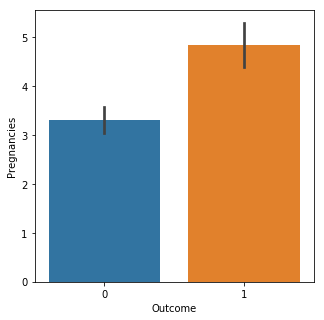

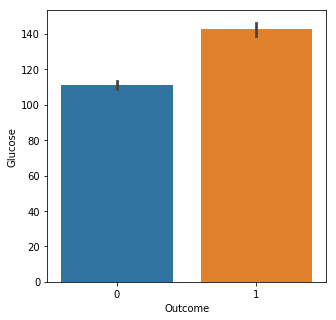

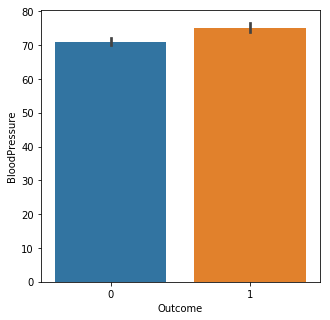

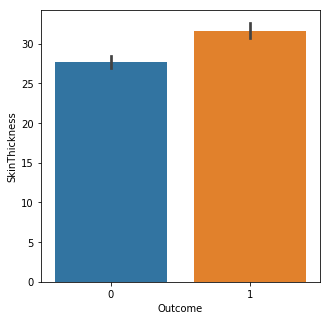

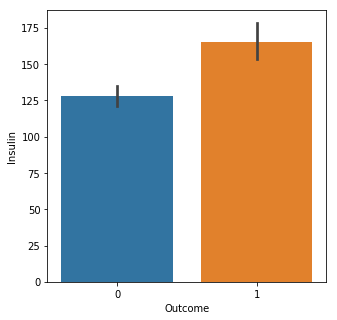

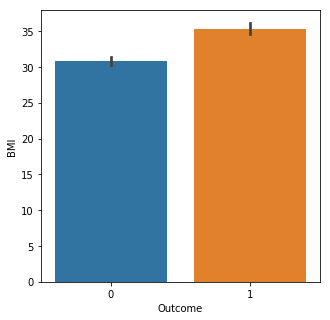

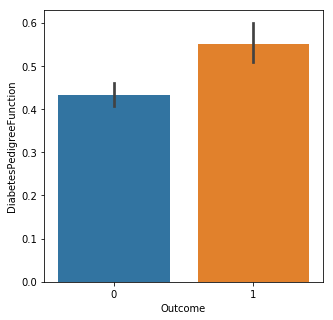

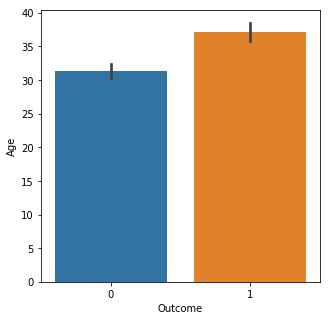

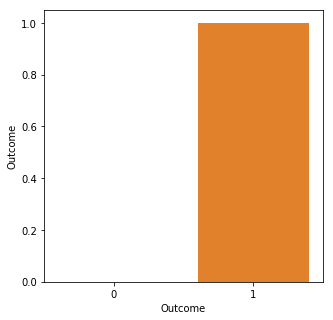

In [95]:
for i in diabetes_data_copy:
    fig, ax2 = plt.subplots(figsize=(5, 5))
    sns.barplot(diabetes_data_copy['Outcome'], diabetes_data_copy[i])

In [35]:
#After Imputation, we will check the correlation again. does it change or not?
diabetes_data_copy_corr=diabetes_data_copy.corr()
diabetes_data_copy_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.21,0.08,0.03,0.02,-0.04,0.55,0.22
Glucose,0.13,1.00,0.22,0.19,0.42,0.23,0.13,0.26,0.49
BloodPressure,0.21,0.22,1.00,0.19,0.04,0.28,-0.00,0.32,0.16
SkinThickness,0.08,0.19,0.19,1.00,0.16,0.54,0.10,0.13,0.21
Insulin,0.03,0.42,0.04,0.16,1.00,0.18,0.13,0.10,0.20
BMI,0.02,0.23,0.28,0.54,0.18,1.00,0.15,0.02,0.31
DiabetesPedigreeFunction,-0.04,0.13,-0.00,0.10,0.13,0.15,1.00,0.03,0.17
Age,0.55,0.26,0.32,0.13,0.10,0.02,0.03,1.00,0.23
Outcome,0.22,0.49,0.16,0.21,0.20,0.31,0.17,0.23,1.00


# Final Conclusion



1)The dataset have nine attributes(parameters) in which there are eight independent variables (Pregnancies,Glucose,Blood Pressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age) and one dependent variable (Outcome).

2)BMI and DiabetesPedigreeFunction are a float data type and other parameters are integer data type.

3)The parameters do not contain any null values (missing values). However, this can not be true. As Insulin,SkinThickness,BloodPressure,BMI,Glucose have zero values.

4)The Outcome parameter shows that there are 500 healthy people and 268 Diabetic people.It means that 65% people are healthy and 34.9% people are diabetic.

5)The parameters Glucose, BloodPressure, BMI are normally distributed. Pregnancies,Insulin,Age,DiabetesPedigreeFunction are rightly skewed.

6)The missing values '0' is replaced by the mean and median of the parameter to explore the dataset.

7)BloodPressure,SkinThickness,Insulin,BMI have outliers.

8)There are no convincing relationship between the parameters.Pregnancies and age have some relationship. Skin Thickness and BMI have some relation also. Most of the aged people have BloodPressure. Higher the Insulin and higher the Glucose.

9)Glucose, Age and BMI are the most Correlated features with the Outcome.Insulin and DiabetesPedigreeFunction have little correlation with the outcome. BloodPressure and SkinThickness have tiny correlation with the outcome.
Age and Pregnancies, BMI and Skin Thickness,Insulin and Glucose are most correlated parameters.

10)The midle aged person is most likely to be diabetic than the young person.

11)After Pregnancy people have more chance of diabeties.

12)People with high Glucose level are more likely to have diabeties.

13)People with high BloodPressure have more chance of diabeties.

14)People with high Insulin level are more likely to have Diabetes.

Now we will divide the dataset into train and test

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
#Dividing into predictors and target.
X=diabetes_data_copy[['Pregnancies','Glucose',
                      'BloodPressure','SkinThickness','Insulin', 'BMI','DiabetesPedigreeFunction','Age']]
Y=diabetes_data_copy['Outcome']

In [38]:
#dividing into train and test dataset
#Dividing the dataset into same strata as it is in original dataset.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=92)

Why Scaling the data for KNN?

it is always advisable to bring all the features to the same scale for applying distance based algorithms like KNN.


We can imagine how the feature with larger range will overshadow the smaller range feature completely and this will impact the performance of all distance based model as larger range features will have the larger weightage than the smaller range features.

In [39]:
#Scaling the dataset 

from sklearn.preprocessing import StandardScaler

X_train =  pd.DataFrame(StandardScaler().fit_transform (X_train))
X_test =   pd.DataFrame(StandardScaler().fit_transform (X_test))

In [40]:
X_train.columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
X_test.columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [41]:
X_train.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
10,0.308536,0.096673,0.448722,-0.229453,-1.359510,-0.390760,-0.155006,0.511933
289,0.014454,0.064509,0.613351,-0.013281,-0.205127,-0.000464,0.116985,-0.563376
446,2.661192,0.707778,0.777979,-1.094142,-0.373241,-1.460460,-0.698987,1.918107


In [42]:
X_test.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
179,1.033041,-0.362146,0.644964,0.254357,-0.127330,0.454166,2.671700,0.981138
32,-1.091615,2.128494,1.305530,1.929723,4.620757,1.533108,-0.790627,-0.569164
168,-1.091615,2.405231,2.626663,-0.518889,-0.127330,0.220881,0.024263,0.798750


In [43]:
#from here we will find out the the value of K 
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,Y_train)
    
    train_scores.append(knn.score(X_train,Y_train))   #pred_y == trainY so 100% score
    
     #how many predY will be equal to the testY so it will have different score 76% and all
    test_scores.append(knn.score(X_test,Y_test))     

In [44]:
train_scores #score is max at K=1 i.e 1 or 100%

#score for training points will be 100% always as you are checking same points you trained with.
#(i.e. distance between point you are scoring is zero,
#as it already exists in your model (KNN) (when u fit)).

[1.0,
 0.8412098298676749,
 0.8449905482041588,
 0.8109640831758034,
 0.8260869565217391,
 0.7996219281663516,
 0.8128544423440454,
 0.7958412098298677,
 0.7863894139886578,
 0.782608695652174,
 0.7901701323251418,
 0.7882797731568998,
 0.7863894139886578,
 0.7939508506616257]

In [45]:
#K will be that which has the highest test score or accuracy.here k=10
test_scores #score is max at k=11 i.e 0.7631 or 76.31%

[0.6973684210526315,
 0.7192982456140351,
 0.7149122807017544,
 0.7324561403508771,
 0.7324561403508771,
 0.7412280701754386,
 0.7456140350877193,
 0.7324561403508771,
 0.7368421052631579,
 0.7631578947368421,
 0.7368421052631579,
 0.75,
 0.75,
 0.7543859649122807]

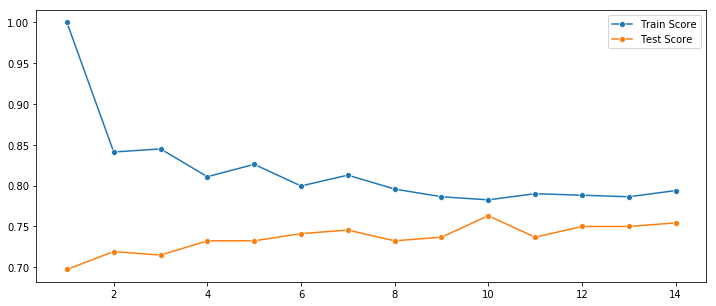

In [46]:
#Plot the same 
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='o',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')


From here we will take k =10

In [150]:
#Setup a knn classifier with k neighbors
#knn = KNeighborsClassifier(10)

#knn.fit(X_train,Y_train)
#knn.score(X_test,Y_test)

0.7631578947368421

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
#2nd method
knn=KNeighborsClassifier(10)
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
acc

0.7631578947368421

A confusion matrix is a table that is used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

True Positives(TP)(130): These are cases in which we predicted yes (they have the disease), and they do have the disease.
True Negatives(TN) (44): We predicted no, and they don't have the disease.
False Positives(FP) (36): We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")
False Negatives(FN)(18): We predicted no, but they actually do have the disease. (Also known as a "Type II error.")

In [52]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(Y_test, Y_pred)
c

array([[130,  18],
       [ 36,  44]], dtype=int64)

In [53]:
pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,130,18,148
1,36,44,80
All,166,62,228


Accuracy: Overall, how often is the classifier correct?
(TP+TN)/total = (130+44)/228 = 0.7631

Misclassification Rate: Overall, how often is it wrong?
(FP+FN)/total = (36+18)/228 = 0.2368
equivalent to 1 minus Accuracy
also known as "Error Rate"

True Positive Rate: When it's actually yes, how often does it predict yes?
TP/(TP+FN) = 130/148 = 0.8783
also known as "Sensitivity" or "Recall"

False Positive Rate: When it's actually no, how often does it predict yes?
FP/FP+TN = 36/80 = 0.4375

True Negative Rate: When it's actually no, how often does it predict no?
TN/TN+FP = 44/80 = 0.55
equivalent to 1 minus False Positive Rate
also known as "Specificity"

Precision: When it predicts yes, how often is it correct?
TP/TP+FP = 130/166 = 0.7831

F1 Score= harmonic mean(precision,recall)
F1 Score=2 (Recall x Precision) / (Recall + Precision)
F1 Score = 2*(.8783*.7831)/(0.8783+0.7831)=0.8279


In [54]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       148
           1       0.71      0.55      0.62        80

    accuracy                           0.76       228
   macro avg       0.75      0.71      0.72       228
weighted avg       0.76      0.76      0.75       228



Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into.




In [97]:
from sklearn.model_selection import cross_val_score
#cross_score=cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
#cross_score
print(cross_val_score(knn, X, Y, cv=10, scoring='accuracy').mean())

0.7398947368421053


Now our model is the most fine tuned.

ROC and Hyper Parameter optimization is remaining(K fold cross validation is also one example of optimization but we need to do more optimization with other methods)